# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" +weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
     
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sungai penuh
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | lorengau
Processing Record 4 of Set 1 | belmonte
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | boyolangu
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | sorong
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | swellendam
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | buchanan
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 |

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

[{'City': 'bereznik', 'Lat': 62.8551, 'Lng': 42.7072, 'Max Temp': 25.23, 'Humidity': 39, 'Cloudiness': 25, 'Wind Speed': 3.19, 'Country': 'RU', 'Date': 1717674040}, {'City': 'puerto natales', 'Lat': -51.7236, 'Lng': -72.4875, 'Max Temp': 0.99, 'Humidity': 98, 'Cloudiness': 100, 'Wind Speed': 1.35, 'Country': 'CL', 'Date': 1717674041}, {'City': 'garden city', 'Lat': 42.3256, 'Lng': -83.331, 'Max Temp': 18.25, 'Humidity': 85, 'Cloudiness': 100, 'Wind Speed': 3.09, 'Country': 'US', 'Date': 1717673949}, {'City': 'grytviken', 'Lat': -54.2811, 'Lng': -36.5092, 'Max Temp': -2.28, 'Humidity': 89, 'Cloudiness': 97, 'Wind Speed': 7.78, 'Country': 'GS', 'Date': 1717674042}, {'City': 'stanley', 'Lat': 54.868, 'Lng': -1.6985, 'Max Temp': 15.84, 'Humidity': 56, 'Cloudiness': 20, 'Wind Speed': 6.17, 'Country': 'GB', 'Date': 1717674043}, {'City': 'thompson', 'Lat': 55.7435, 'Lng': -97.8558, 'Max Temp': 3.09, 'Humidity': 93, 'Cloudiness': 100, 'Wind Speed': 3.09, 'Country': 'CA', 'Date': 1717674043}, {

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bereznik,62.8551,42.7072,25.23,39,25,3.19,RU,1717674040
1,puerto natales,-51.7236,-72.4875,0.99,98,100,1.35,CL,1717674041
2,garden city,42.3256,-83.3310,18.25,85,100,3.09,US,1717673949
3,grytviken,-54.2811,-36.5092,-2.28,89,97,7.78,GS,1717674042
4,stanley,54.8680,-1.6985,15.84,56,20,6.17,GB,1717674043


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bereznik,62.8551,42.7072,25.23,39,25,3.19,RU,1717674040
1,puerto natales,-51.7236,-72.4875,0.99,98,100,1.35,CL,1717674041
2,garden city,42.3256,-83.3310,18.25,85,100,3.09,US,1717673949
3,grytviken,-54.2811,-36.5092,-2.28,89,97,7.78,GS,1717674042
4,stanley,54.8680,-1.6985,15.84,56,20,6.17,GB,1717674043


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

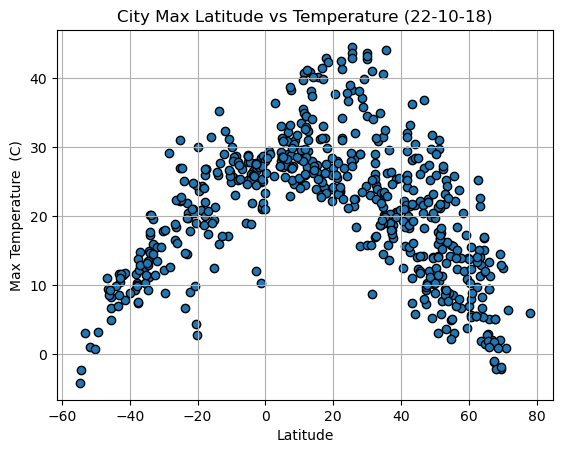

In [ ]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Max Temp'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

plt.title('City Max Latitude vs Temperature (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature  (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE




#### Latitude Vs. Humidity

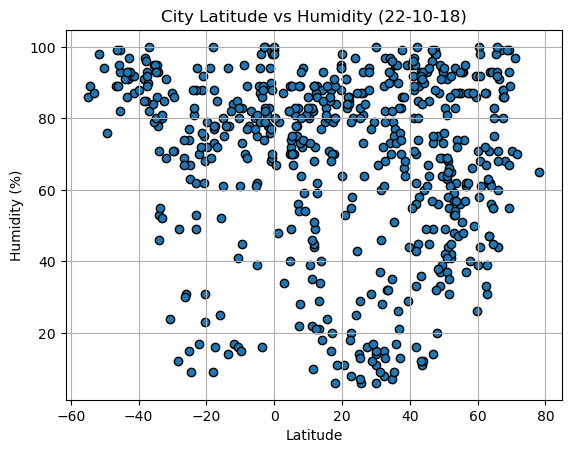

In [ ]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Humidity'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Humidity (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

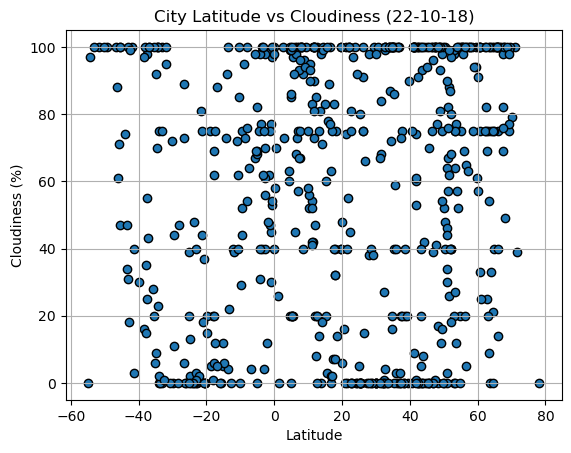

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Cloudiness'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Cloudiness (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

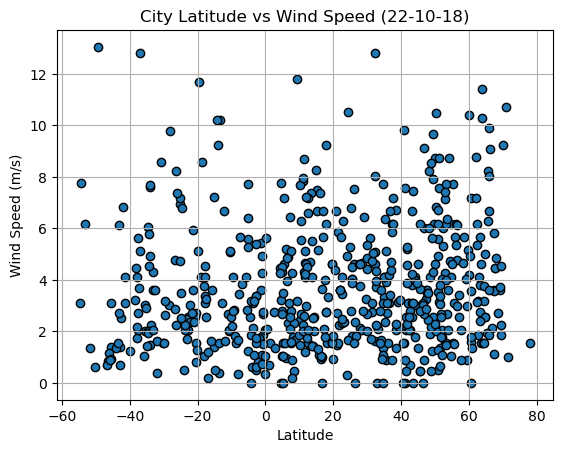

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Wind Speed'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs Wind Speed (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # linear regression
    (slope, intercept, rvalue) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #y = 2x + 28 were 28 is they y-intercept and 2 is the clope of the graph

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f" r-value is: {rvalue**2}")
    plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bereznik,62.8551,42.7072,25.23,39,25,3.19,RU,1717674040
2,garden city,42.3256,-83.3310,18.25,85,100,3.09,US,1717673949
4,stanley,54.8680,-1.6985,15.84,56,20,6.17,GB,1717674043
5,thompson,55.7435,-97.8558,3.09,93,100,3.09,CA,1717674043
8,bethel,41.3712,-73.4140,21.22,88,100,2.06,US,1717673843


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,0.99,98,100,1.35,CL,1717674041
3,grytviken,-54.2811,-36.5092,-2.28,89,97,7.78,GS,1717674042
6,paciran,-6.8767,112.3761,26.81,82,4,3.85,ID,1717674044
7,port-aux-francais,-49.3500,70.2167,3.15,76,100,13.05,TF,1717674044
9,puerto aysen,-45.4000,-72.7000,8.30,99,100,1.41,CL,1717673791


###  Temperature vs. Latitude Linear Regression Plot

In [11]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df.Lat
y = northern_hemi_df['Maximum Temp']
(x_values, y_values, "Latitude", "Max Temp", (0,0))

NameError: name 'northern_hemi_df' is not defined

The r-value is: 0.4121057168607245


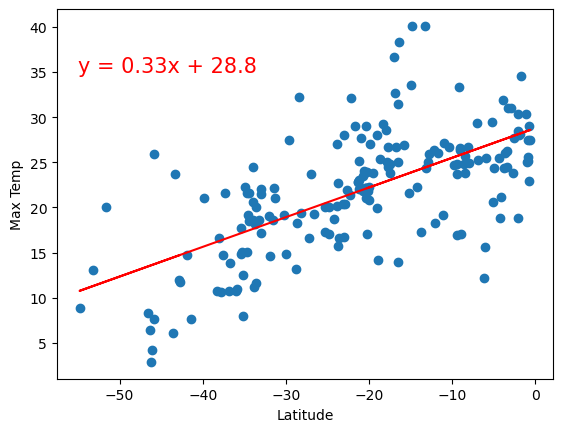

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


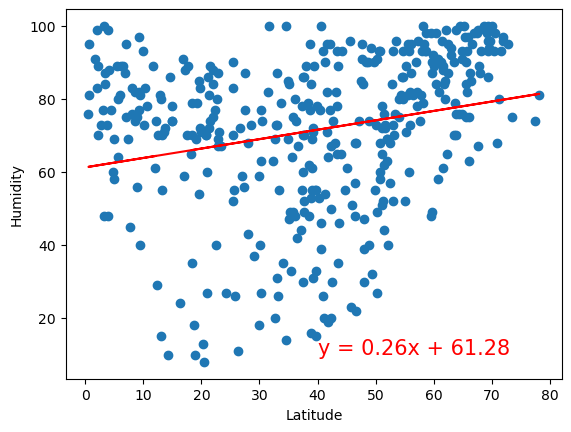

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


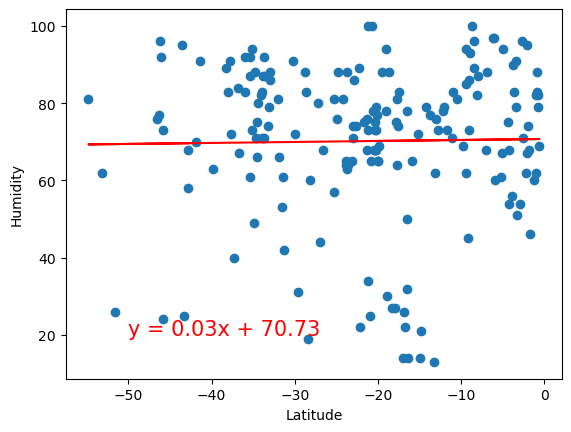

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


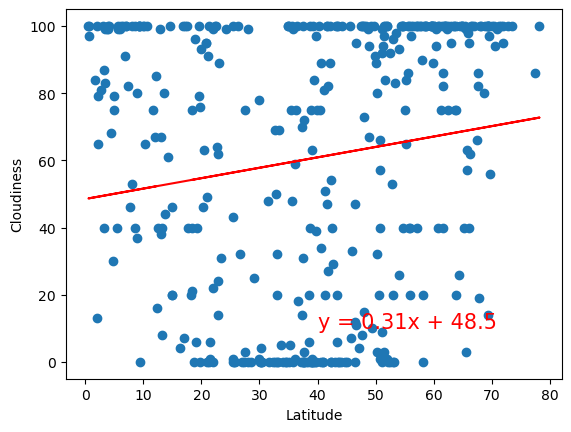

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


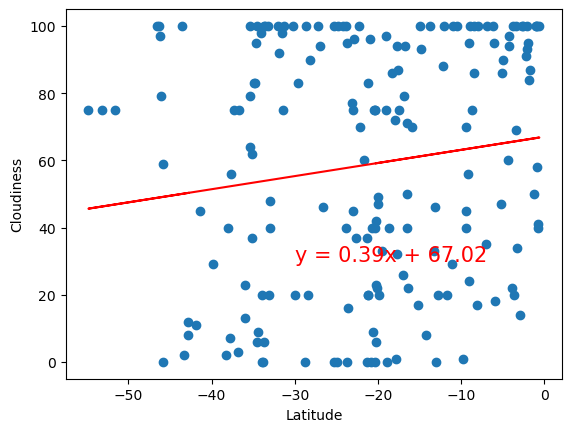

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


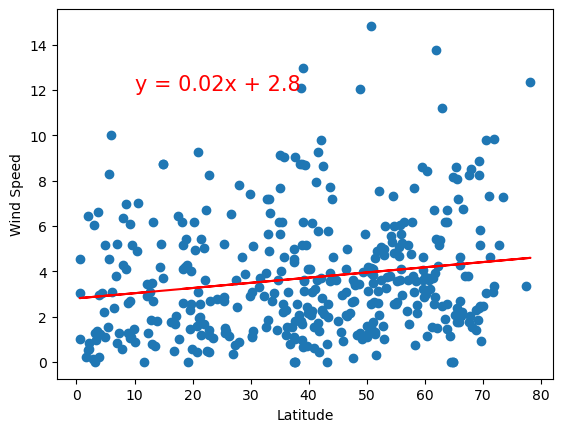

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


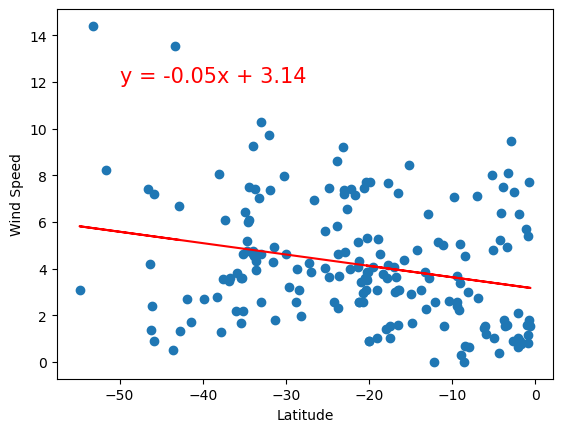

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
there